
# **Background**

**AQI**
> The Air Quality Index (AQI) serves as the predominant method for assessing the present state of air quality. It utilizes a numerical scale ranging from 0 to 500, where 0 represents excellent air quality and 500 indicates extremely dangerous conditions. The AQI is determined by considering the moving averages or current measurements of various pollutants such as PM2.5 (particulate matter), PM10, Ozone, Carbon Monoxide, and so on.

**Health Insurance Rate**
> The Public Use Files of the Health Insurance Marketplace comprise information regarding health and dental plans available to individuals and small businesses via the United States Health Insurance Marketplace.

---

# **Source of Data**

*   US Air Quality 1980-Present:
https://www.kaggle.com/datasets/calebreigada/us-air-quality-1980present?resource=download

*   Health Insurance Marketplace:
https://www.kaggle.com/datasets/hhs/health-insurance-marketplace/code






# **Hypotheses**

1.   Population density is correlated with bad air quality
2.   With a decrement in air quality, the insurance rates in the US go up
3.   For states with higher AQI, there is a greater correlation to higher insurance rates


## **Cleaning the Jupyter Notebook**

In [ ]:
import pandas as pd
import numpy as np

We will remove:
*   All rows where we do not have an Individual Rate provided
*   Rows with null data



In [ ]:
# import data
df = pd.read_csv('merged_small.csv')
# df = pd.read_csv('merged.csv')
df = df.dropna( subset=['IndividualTobaccoRate',
                                   'Couple', 'PrimarySubscriberAndOneDependent',
                                   'PrimarySubscriberAndTwoDependents',
                                   'PrimarySubscriberAndThreeOrMoreDependents',
                                   'CoupleAndOneDependent', 'CoupleAndTwoDependents',
                                   'CoupleAndThreeOrMoreDependents'
                                   ], how='all')
df = df[df.IndividualRate != 0]
df = df.rename(columns={"Unnamed: 0": "ID"})
df

,ID,BusinessYear,StateCode,ImportDate,RateEffectiveDate,RateExpirationDate,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,AQI,population,density
0,12613761,2016,VA,2015-08-27 03:52:03,2016-01-01,2016-12-31,Tobacco User/Non-Tobacco User,61,623.57,748.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.804832,4.277904e+05,1136.033220
2,5586390,2015,SC,2014-11-13 10:25:37,2015-01-01,2015-12-31,Tobacco User/Non-Tobacco User,56,942.86,1131.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.515401,2.263513e+05,547.874962
4,7221854,2015,IL,2015-01-31 17:35:53,2015-01-01,2015-12-31,Tobacco User/Non-Tobacco User,37,371.26,408.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.335928,1.100689e+06,1294.727895
5,340916,2014,FL,2014-01-17 09:36:20,2014-01-01,2014-12-31,Tobacco User/Non-Tobacco User,21,237.04,284.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.710382,7.353156e+05,848.059231
6,6587565,2015,WI,2014-11-11 04:41:18,2015-01-01,2015-12-31,Tobacco User/Non-Tobacco User,38,299.00,343.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.651713,2.083291e+05,1029.833645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499985,6915309,2015,WI,2014-11-09 04:38:15,2015-04-01,2015-06-30,Tobacco User/Non-Tobacco User,58,757.74,947.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.651713,2.083291e+05,1029.833645
499991,11193797,2016,WI,2015-10-18 12:35:12,2016-01-01,2016-12-31,Tobacco User/Non-Tobacco User,47,382.40,420.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.591854,2.128800e+05,1038.930632
499993,10710974,2016,TN,2015-10-20 04:38:50,2016-01-01,2016-12-31,Tobacco User/Non-Tobacco User,32,526.72,605.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.198127,3.877369e+05,516.207792
499994,11172932,2016,WI,2015-10-20 04:38:50,2016-01-01,2016-12-31,Tobacco User/Non-Tobacco User,56,485.61,572.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.591854,2.128800e+05,1038.930632


Let's understand the nature of our data through some basic statistical observations

In [ ]:
df.describe()

,ID,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,AQI,population,density
count,1.957280e+05,195728.000000,195728.000000,194276.00000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,195728.000000,1.957280e+05,195728.000000
mean,6.097202e+06,2014.982328,451.261869,543.00923,55.356639,56.397989,79.434077,100.461212,82.709435,101.240613,122.310758,40.707334,4.214754e+05,877.928480
std,3.617364e+06,0.801093,236.763840,295.26525,27.115355,26.644099,41.701458,56.258891,44.195744,56.044295,71.667205,3.479624,2.723947e+05,375.190184
min,1.000000e+00,2014.000000,0.010000,63.36000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.613585,2.853600e+04,152.428835
25%,2.824979e+06,2014.000000,291.760000,339.55000,31.832500,33.317500,34.825000,36.030000,36.407500,42.417500,43.217500,38.873842,2.210396e+05,547.874962
50%,5.827619e+06,2015.000000,387.660000,462.50500,55.880000,57.080000,84.755000,110.835000,87.260000,110.135000,130.410000,39.710382,3.396586e+05,824.452524
75%,9.374057e+06,2016.000000,563.100000,681.84000,74.307500,75.785000,112.732500,145.232500,116.247500,143.145000,180.940000,42.786949,5.570778e+05,1038.930632
max,1.267468e+07,2016.000000,5204.780000,6245.75000,151.670000,151.410000,226.990000,332.800000,227.250000,302.830000,408.640000,51.936204,1.110694e+06,2013.281027


## **Hypothesis 1 and 2**

Get a correlation table between all variables

In [ ]:
correlation = df.corr()
correlation.to_csv('correlation.csv')
correlation

,ID,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,AQI,population,density
ID,1.000000,0.945410,0.028622,-0.028648,0.156269,0.166320,0.141303,0.082941,0.153277,0.119604,0.075947,-0.204202,-0.068840,-0.100209
BusinessYear,0.945410,1.000000,0.036080,-0.015775,0.135575,0.139885,0.122756,0.071720,0.121024,0.095860,0.059878,-0.213843,-0.022895,-0.174530
IndividualRate,0.028622,0.036080,1.000000,0.974151,0.692176,0.603671,0.581775,0.554724,0.601322,0.602464,0.566805,-0.015432,-0.048578,-0.038825
IndividualTobaccoRate,-0.028648,-0.015775,0.974151,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004923,-0.087320,-0.076040
Couple,0.156269,0.135575,0.692176,NaN,1.000000,0.955902,0.945034,0.919858,0.960368,0.965198,0.926272,0.074244,-0.064120,0.090053
PrimarySubscriberAndOneDependent,0.166320,0.139885,0.603671,NaN,0.955902,1.000000,0.957289,0.899383,0.986890,0.957096,0.896815,0.083862,-0.056681,0.105231
PrimarySubscriberAndTwoDependents,0.141303,0.122756,0.581775,NaN,0.945034,0.957289,1.000000,0.963166,0.969372,0.970334,0.932540,0.067833,-0.074614,0.083902
PrimarySubscriberAndThreeOrMoreDependents,0.082941,0.071720,0.554724,NaN,0.919858,0.899383,0.963166,1.000000,0.909682,0.974890,0.986664,0.067292,-0.063938,0.061180
CoupleAndOneDependent,0.153277,0.121024,0.601322,NaN,0.960368,0.986890,0.969372,0.909682,1.000000,0.968280,0.906690,0.096344,-0.056973,0.103192
CoupleAndTwoDependents,0.119604,0.095860,0.602464,NaN,0.965198,0.957096,0.970334,0.974890,0.968280,1.000000,0.982241,0.087062,-0.046685,0.085781


Visualize that through a heatmap

<AxesSubplot:>

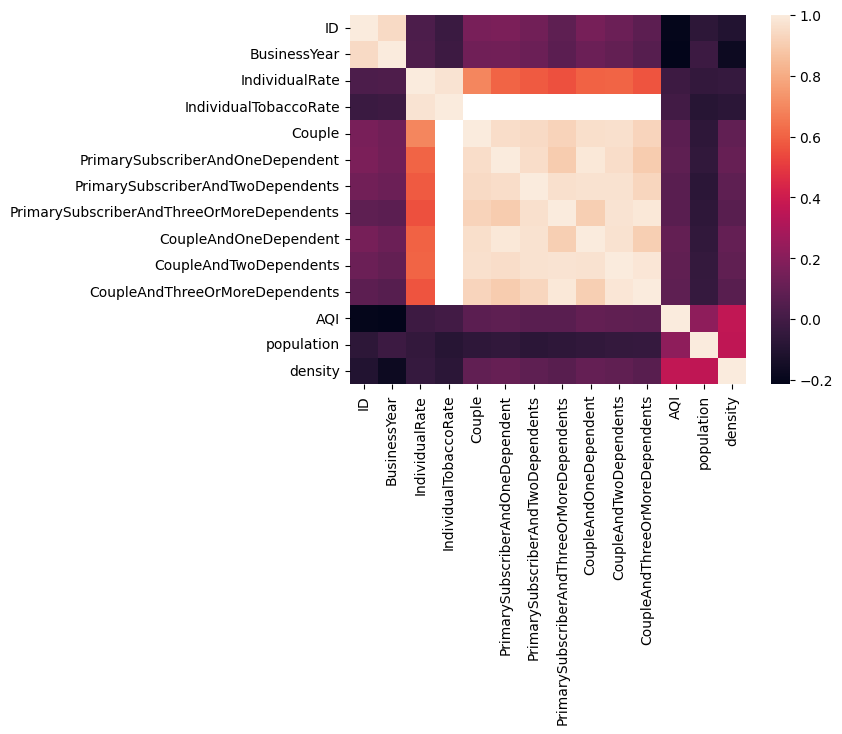

In [ ]:
import seaborn as sns
sns.heatmap(correlation)

## **Hypothesis 3**

Now let's do the same thing - create a correlation chart - but for each individual state

In [ ]:
df_filtered = df.filter(['IndividualRate', 'AQI', 'population', 'density', 'StateCode'], axis=1)
correlation_by_state = df_filtered.groupby(['StateCode']).corr()
correlation_by_state.to_csv('correlation_by_state.csv')
correlation_by_state

IndividualRate       AQI  population   density
StateCode                                                               
AK        IndividualRate        1.000000 -0.434677    0.387873  0.387873
          AQI                  -0.434677  1.000000   -0.943254 -0.943254
          population            0.387873 -0.943254    1.000000  1.000000
          density               0.387873 -0.943254    1.000000  1.000000
AL        IndividualRate        1.000000  0.211871   -0.109562  0.181784
...                                  ...       ...         ...       ...
WV        density               0.086529 -0.998130    0.999775  1.000000
WY        IndividualRate        1.000000 -0.021249         NaN       NaN
          AQI                  -0.021249  1.000000         NaN       NaN
          population                 NaN       NaN         NaN       NaN
          density                    NaN       NaN         NaN       NaN

[156 rows x 4 columns]

In [ ]:
# df_filtered = df.filter(['BusinessYear','AQI','IndividualRate', 'AQI', 'population', 'density', 'StateCode'], axis=1)
df_filtered = df.filter(['IndividualRate', 'AQI', 'StateCode'], axis=1)
correlation_by_state = df_filtered.groupby(['StateCode']).corr()

#clean
correlation_by_state = correlation_by_state.reset_index()
correlation_by_state = correlation_by_state[correlation_by_state['level_1']=="AQI"]
correlation_by_state = correlation_by_state[['StateCode', 'IndividualRate']]
correlation_by_state.reset_index(drop=True, inplace=True)
correlation_by_state = correlation_by_state.rename({'IndividualRate': 'AQI_corr_IR'}, axis=1)

correlation_by_state.to_csv('correlation_by_state_cleaned.csv')
# correlation_by_state

In [ ]:
# mean of AQIs by state
df_aqi_mean = df.groupby(['StateCode']).mean().filter(['StateCode', 'AQI'])

# join the two dfs
df_combined = pd.merge(correlation_by_state, df_aqi_mean, how='left', on=['StateCode'])

# save and display
df_combined.to_csv('correlation_with_AQI_mean.csv')
df_combined

,StateCode,AQI_corr_IR,AQI
0,AK,-0.434677,45.165333
1,AL,0.211871,41.686501
2,AR,-0.014588,37.838027
3,AZ,0.140866,48.417744
4,DE,-0.183935,42.513061
5,FL,-0.058038,38.863585
6,GA,0.060951,41.876924
7,HI,NaN,34.133028
8,IA,-0.063948,41.975557
9,ID,NaN,27.613585


In [ ]:
# df_filtered = df.filter(['BusinessYear','AQI','IndividualRate', 'AQI', 'population', 'density', 'StateCode'], axis=1)
df_filtered = df.filter(['IndividualRate', 'AQI', 'StateCode'], axis=1)
correlation_by_state = df_filtered.groupby(['StateCode']).corr()

#clean
correlation_by_state = correlation_by_state.reset_index()
correlation_by_state = correlation_by_state[correlation_by_state['level_1']=="AQI"]
correlation_by_state = correlation_by_state[['StateCode', 'IndividualRate']]
correlation_by_state.reset_index(drop=True, inplace=True)
correlation_by_state = correlation_by_state.rename({'IndividualRate': 'AQI_corr_IR'}, axis=1)

correlation_by_state.to_csv('correlation_by_state_cleaned.csv')
# correlation_by_state

In [ ]:
hist, bin_edges = np.histogram(df_combined['AQI'], bins=3)
bin_edges

array([27.61358491, 35.25246273, 42.89134055, 50.53021838])

In [ ]:
bins = list(bin_edges)
bins = [0] + bins
bins

[0,
 27.613584905660375,
 35.25246272948214,
 42.89134055330391,
 50.53021837712568]

In [ ]:
# split df into bins
df_min = df.filter(['IndividualRate', 'AQI', 'StateCode'], axis=1)
lst_df_by_bins = [df_min[(bins[i]<=df_min['AQI']) & (df_min['AQI']<=bins[i+1])] for i in range(len(bins)-1)]

# split
corr_by_bins = []
for df_by_bin in lst_df_by_bins:
  corr_by_bins.append(df_by_bin.corr())
  # corr_by_bins.append(df_by_bin.groupby(['StateCode']).corr())

## **Further Exploration**

#### AQI year on year

In [ ]:
df_filtered = df.filter(['IndividualRate', 'AQI', 'population', 'density', 'StateCode', 'BusinessYear'], axis=1)
correlation_by_state_yr = df_filtered.groupby(['BusinessYear']).corr()
correlation_by_state_yr.to_csv('correlation_by_state_yr.csv')
correlation_by_state_yr

IndividualRate       AQI  population   density
BusinessYear                                                               
2014         IndividualRate        1.000000  0.018648   -0.045352 -0.018535
             AQI                   0.018648  1.000000    0.126774  0.247072
             population           -0.045352  0.126774    1.000000  0.268058
             density              -0.018535  0.247072    0.268058  1.000000
2015         IndividualRate        1.000000 -0.044095   -0.037457 -0.038775
             AQI                  -0.044095  1.000000    0.290363  0.438155
             population           -0.037457  0.290363    1.000000  0.426021
             density              -0.038775  0.438155    0.426021  1.000000
2016         IndividualRate        1.000000 -0.019421   -0.063797 -0.055699
             AQI                  -0.019421  1.000000    0.275774  0.347726
             population           -0.063797  0.275774    1.000000  0.406833
             density              -0.055699  0.347726    0.406833  1.000000

#### Applying Machine Learning

Review the variable correlation table

In [ ]:
correlation

,ID,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,AQI,population,density
ID,1.000000,0.945410,0.028622,-0.028648,0.156269,0.166320,0.141303,0.082941,0.153277,0.119604,0.075947,-0.204202,-0.068840,-0.100209
BusinessYear,0.945410,1.000000,0.036080,-0.015775,0.135575,0.139885,0.122756,0.071720,0.121024,0.095860,0.059878,-0.213843,-0.022895,-0.174530
IndividualRate,0.028622,0.036080,1.000000,0.974151,0.692176,0.603671,0.581775,0.554724,0.601322,0.602464,0.566805,-0.015432,-0.048578,-0.038825
IndividualTobaccoRate,-0.028648,-0.015775,0.974151,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004923,-0.087320,-0.076040
Couple,0.156269,0.135575,0.692176,NaN,1.000000,0.955902,0.945034,0.919858,0.960368,0.965198,0.926272,0.074244,-0.064120,0.090053
PrimarySubscriberAndOneDependent,0.166320,0.139885,0.603671,NaN,0.955902,1.000000,0.957289,0.899383,0.986890,0.957096,0.896815,0.083862,-0.056681,0.105231
PrimarySubscriberAndTwoDependents,0.141303,0.122756,0.581775,NaN,0.945034,0.957289,1.000000,0.963166,0.969372,0.970334,0.932540,0.067833,-0.074614,0.083902
PrimarySubscriberAndThreeOrMoreDependents,0.082941,0.071720,0.554724,NaN,0.919858,0.899383,0.963166,1.000000,0.909682,0.974890,0.986664,0.067292,-0.063938,0.061180
CoupleAndOneDependent,0.153277,0.121024,0.601322,NaN,0.960368,0.986890,0.969372,0.909682,1.000000,0.968280,0.906690,0.096344,-0.056973,0.103192
CoupleAndTwoDependents,0.119604,0.095860,0.602464,NaN,0.965198,0.957096,0.970334,0.974890,0.968280,1.000000,0.982241,0.087062,-0.046685,0.085781


In [ ]:
from sklearn.preprocessing import normalize

df_num = df_filtered.select_dtypes(include='number').columns
df_num = df_filtered[df_num]
df_normalized=normalize(df_num)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
df_reduced = sklearn_pca.fit_transform(df_normalized)
df_reduced = pd.DataFrame(df_reduced)

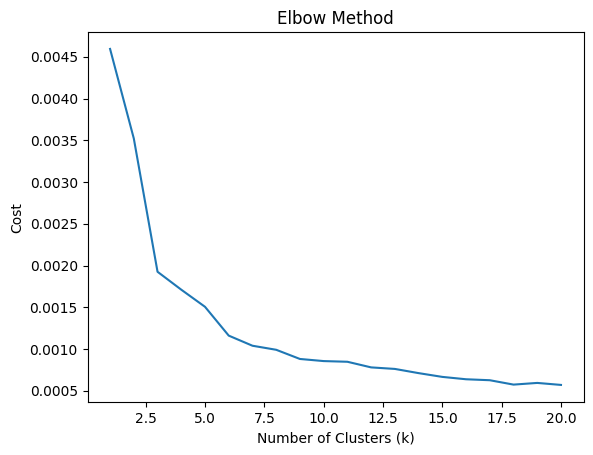

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = df_reduced
costs = []
max_k = 20
range_of_k = range(1, max_k+1)

for k in range_of_k:
    n = data.shape[0]
    kmeans = KMeans(k)
    kmeans.fit(data)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    step = kmeans.n_iter_

    distances = np.zeros((n, k))
    for i in range(k):
        distances[:, i] = np.linalg.norm(data - centroids[i, :], axis=1)
    # Cost: Normalized Sum of Distances to Closest Centroid
    cost = np.sum(np.min(distances, axis=1))/n
    costs.append(cost)

plt.plot(range_of_k, costs)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.show()

In [ ]:
kmeans = KMeans(5) # We get 3 from the elbow method
kmeans.fit(df_reduced)

clusters = kmeans.labels_ # Getting cluster labels
centroids = kmeans.cluster_centers_ # Predicted centroids
steps = kmeans.n_iter_ # Steps till convergence

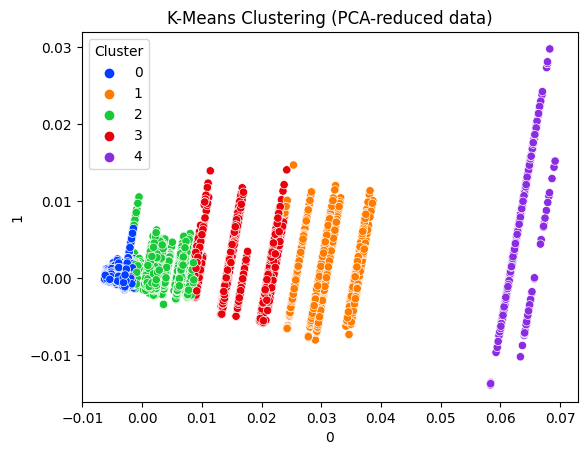

In [ ]:
res = df_reduced.join(pd.DataFrame(clusters, columns=["Cluster"]))
# print(res)

sns.scatterplot(data=res, x=0, y=1, hue='Cluster', palette='bright')
plt.title('K-Means Clustering (PCA-reduced data)')
plt.show()

In [ ]:
kmeans = KMeans(3)
kmeans.fit(df_normalized)

clusters = kmeans.labels_ # Getting cluster labels
centroids = kmeans.cluster_centers_ # Predicted centroids
steps = kmeans.n_iter_ # Steps till convergence

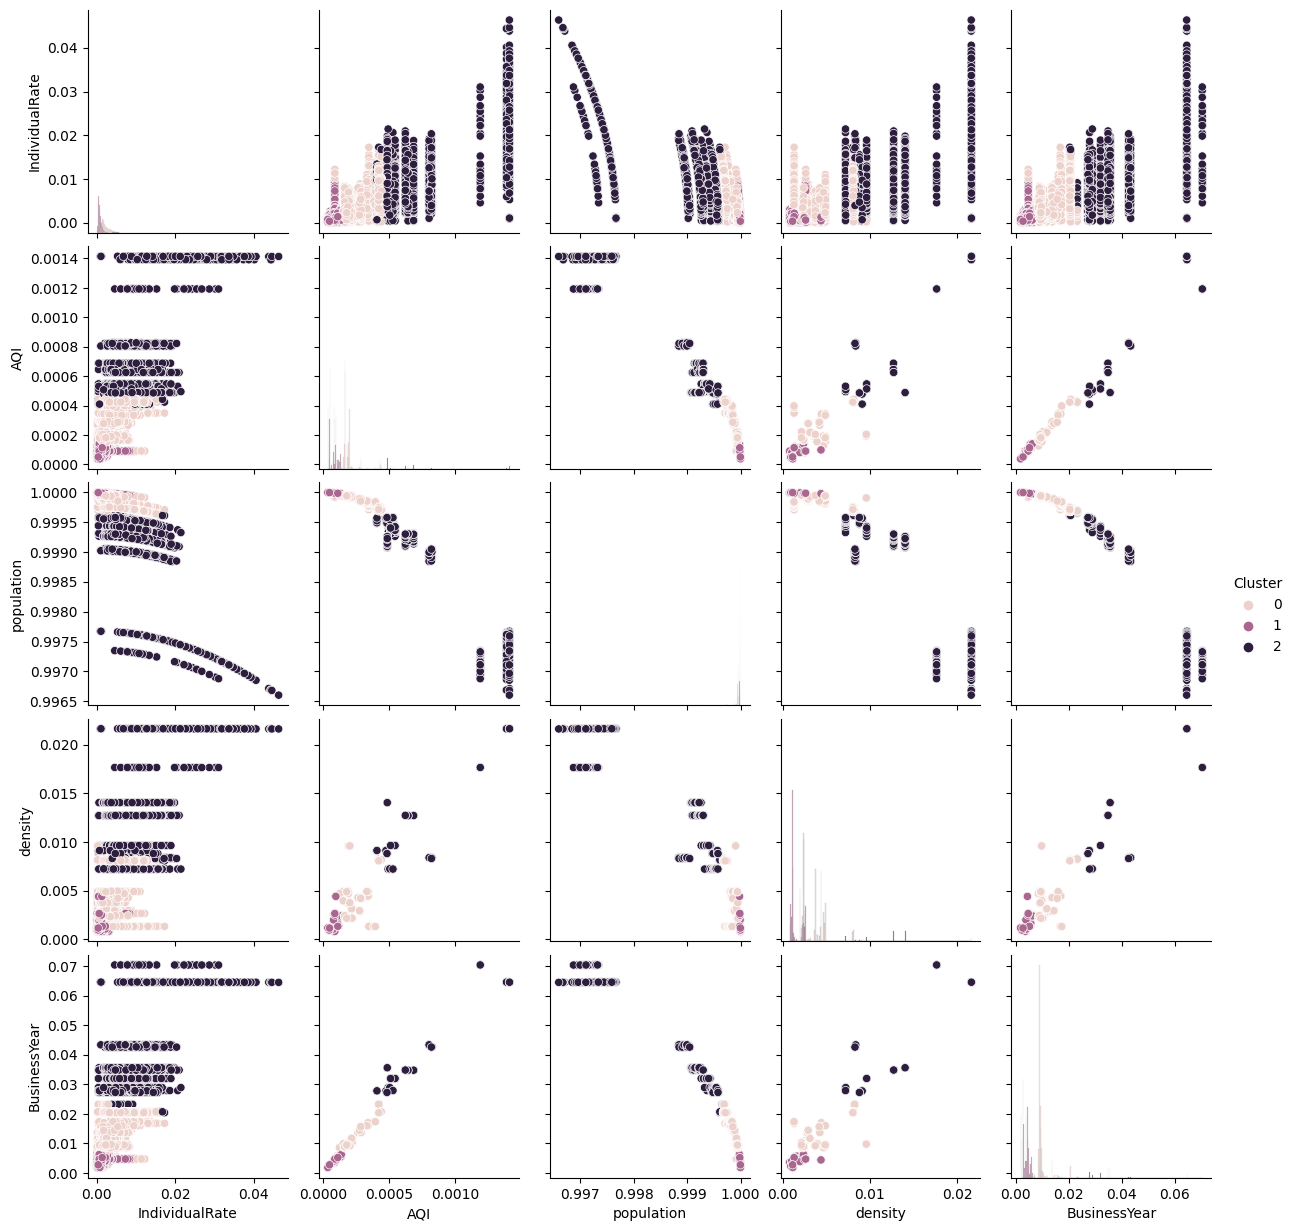

In [ ]:
res = pd.DataFrame(df_normalized, columns=df_num.columns)
res = res.join(pd.DataFrame(clusters, columns=["Cluster"]))
sns.pairplot(res, hue="Cluster", diag_kind="hist")